In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from skimage.transform import resize
from matplotlib.ticker import MultipleLocator

In [35]:
plt.rcParams.update({
    'legend.fontsize': 14,  # Legend font size
    'axes.labelsize': 14,   # Axis label font size
    'xtick.labelsize': 12,  # X-axis tick label size
    'ytick.labelsize': 12   # Y-axis tick label size
})

plt.rcParams['image.cmap'] = 'viridis'

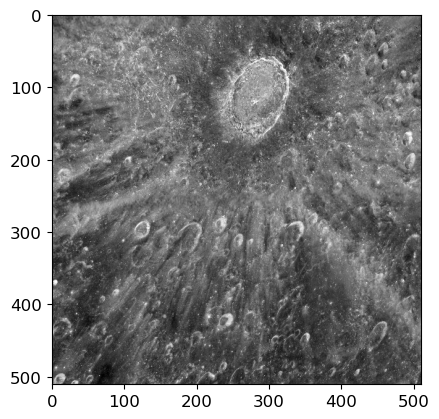

In [21]:
from PIL import Image
image = Image.open('tycho-crater.png').convert('L')
image_data = np.array(image)

x_orig = resize(image_data, (511,511), anti_aliasing = False)
x_orig = np.array(x_orig)

plt.imshow(x_orig, cmap='gray')

In [22]:
x_orig.max()

1.0

In [5]:
data_SL = np.load('runs/KLbAx_deblurring/20250320-235747/SL.npz')
data_ML = np.load('runs/KLbAx_deblurring/20250320-235747/ML.npz')

# data_SL_cont=np.load('runs/KLAxb_reconstruction/20250311-130923/SL.npz')
# data_ML_cont=np.load('runs/KLAxb_reconstruction/20250311-154941/ML.npz')

cumaltive_times_SL = [sum(data_SL['iteration_times_SL'][:i+1]) for i in range(len(data_SL['iteration_times_SL']))]
cumaltive_times_ML = [sum(data_ML['iteration_times_ML'][:i+1]) for i in range(len(data_ML['iteration_times_ML']))]
# cumaltive_times_SL_cont = [sum(data_SL_cont['iteration_times_SL'][:i+1]) for i in range(1,len(data_SL_cont['iteration_times_SL']))]
# cumaltive_times_SL_cont = np.array(cumaltive_times_SL_cont) + cumaltive_times_SL[-1]

# cumaltive_times_ML_cont = [sum(data_ML_cont['iteration_times_ML'][:i+1]) for i in range(1,len(data_ML_cont['iteration_times_ML']))]
# cumaltive_times_ML_cont = np.array(cumaltive_times_ML_cont) + cumaltive_times_ML[-1]

# cumaltive_times_SL_all = np.append(cumaltive_times_SL, cumaltive_times_SL_cont)
# data_SL_all = np.append(data_SL['norm_fval_SL'], data_SL_cont['norm_fval_SL'][1:] * data_SL['norm_fval_SL'][-1])

# cumaltive_times_ML_all = np.append(cumaltive_times_ML, cumaltive_times_ML_cont)
# data_ML_all = np.append(data_ML['norm_fval_ML'], data_ML_cont['norm_fval_ML'][1:] * data_ML['norm_fval_ML'][-1])

In [ ]:
# data_SL = np.load('runs/KLbAx_reconstruction/20250310-164654/SL.npz')
# data_ML = np.load('runs/KLbAx_reconstruction/20250310-164654/ML.npz')

# data_SL_cont=np.load('runs/KLbAx_reconstruction/20250311-120928/SL.npz')

# cumaltive_times_SL = [sum(data_SL['iteration_times_SL'][:i+1]) for i in range(len(data_SL['iteration_times_SL']))]
# cumaltive_times_ML = [sum(data_ML['iteration_times_ML'][:i+1]) for i in range(len(data_ML['iteration_times_ML']))]
# cumaltive_times_SL_cont = [sum(data_SL_cont['iteration_times_SL'][:i+1]) for i in range(1,len(data_SL_cont['iteration_times_SL']))]
# cumaltive_times_SL_cont = np.array(cumaltive_times_SL_cont) + cumaltive_times_SL[-1]

# cumaltive_times_SL_all = np.append(cumaltive_times_SL, cumaltive_times_SL_cont)
# data_SL_all = np.append(data_SL['norm_fval_SL'], data_SL_cont['norm_fval_SL'][1:] * data_SL['norm_fval_SL'][-1])

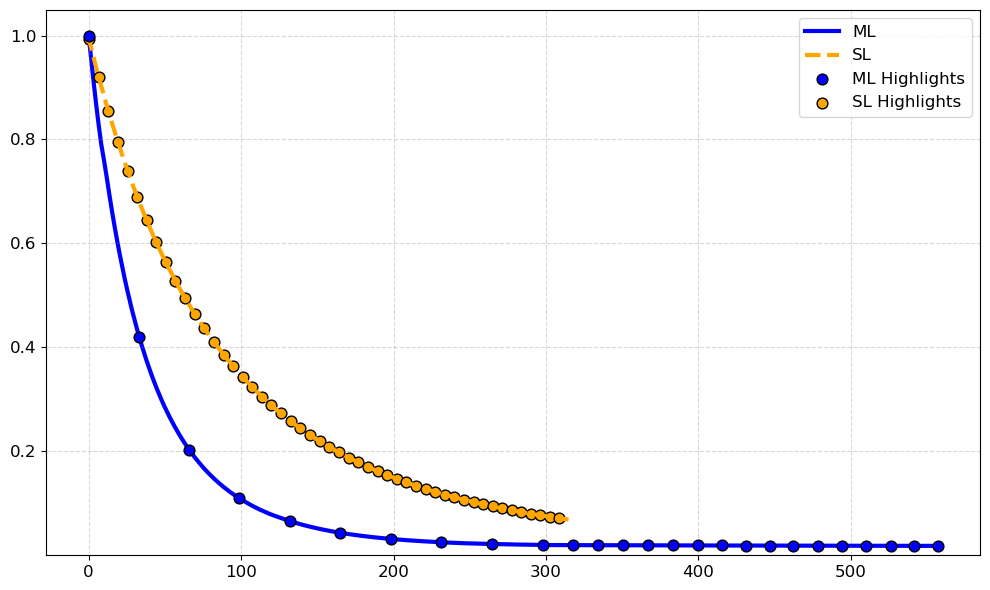

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(cumaltive_times_ML, data_ML['norm_fval_ML'], linestyle='-', linewidth=3, label='ML', color='blue', zorder=1)
#plt.plot(cumaltive_times_ML_all, data_ML_all, linestyle='-', linewidth=3, label='ML', color='blue', zorder=1)
plt.plot(cumaltive_times_SL, data_SL['norm_fval_SL'], linestyle='--', linewidth=3, label='SL', color='orange')
#plt.plot(cumaltive_times_SL_all, data_SL_all, linestyle='--', linewidth=3, label='SL', color='orange', zorder=1)

highlight_every = 20  

plt.scatter(cumaltive_times_ML[::highlight_every], data_ML['norm_fval_ML'][::highlight_every], 
            color='blue', edgecolors='black', s=60, marker='o', label="ML Highlights", zorder=2)

# plt.scatter(cumaltive_times_ML_all[::highlight_every], data_ML_all[::highlight_every], 
#             color='blue', edgecolors='black', s=60, marker='o', zorder=2)

# plt.scatter(cumaltive_times_ML[83], data_ML['norm_fval_ML'][83], 
#             color='red', edgecolors='black', s=60, marker='o', zorder=2)

plt.scatter(cumaltive_times_SL[1::highlight_every], data_SL['norm_fval_SL'][1::highlight_every], 
            color='orange', edgecolors='black', s=60, marker='o', label="SL Highlights")

# plt.scatter(cumaltive_times_SL_all[::highlight_every], data_SL_all[::highlight_every], 
#             color='orange', edgecolors='black', s=60, marker='o', zorder=2)

#plt.xlabel('Cumulative CPU Time (seconds)', fontsize=14)
#plt.ylabel('Normalised Function Value', fontsize=14)
#plt.yscale('log')
plt.ylim(bottom=0.15*10e-6)
#plt.xlim(right=3600)
plt.grid(True, linestyle='--', color='gray', alpha=0.3)
plt.legend(fontsize=12, loc='best')

plt.tight_layout()
plt.savefig('CPU_improved.png', format='png', dpi=300)
plt.show()


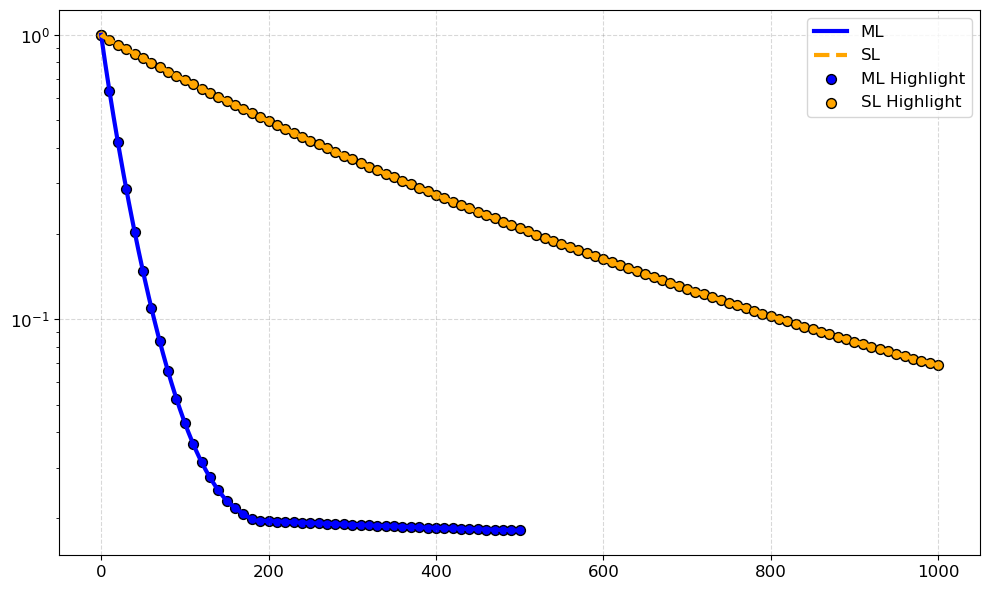

In [7]:
plt.figure(figsize=(10, 6))

# Plot ML with a solid line, no markers, and higher line width
plt.plot(data_ML['norm_fval_ML'], linestyle='-', linewidth=3, label='ML', color='blue')
# t = np.arange(1, 300)
# z = 1/t**2
# plt.plot(z)

# Plot SL with a dashed line, no markers, and slightly thinner line
plt.plot(data_SL['norm_fval_SL'], linestyle='--', linewidth=3, label='SL', color='orange')

# Add selective markers (e.g., every 10 iterations)
highlight_every = 10
plt.scatter(range(0, len(data_ML['norm_fval_ML']), highlight_every),
            data_ML['norm_fval_ML'][::highlight_every],
            color='blue', edgecolors='black', s=50, label="ML Highlight" if highlight_every == 10 else "")

plt.scatter(range(0, len(data_SL['norm_fval_SL']), highlight_every),
            data_SL['norm_fval_SL'][::highlight_every],
            color='orange', edgecolors='black', s=50, label="SL Highlight" if highlight_every == 10 else "")

#plt.xlabel('Iterations', fontsize=14)
#plt.ylabel('Normalised Function Value', fontsize=14)
plt.yscale('log')
plt.grid(True, linestyle='--', color='gray', alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()  # Avoid cutting off labels

plt.savefig('iterations_improved.png', format='png', dpi=300)
plt.show()


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from skimage.transform import resize

In [91]:
data_SL = np.load('runs/KLbAx_deblurring/20250503-174846/SL.npz')
data_ML = np.load('runs/KLbAx_deblurring/20250503-174846/ML.npz')

cumaltive_times_SL = [sum(data_SL['iteration_times_SL'][:i+1]) for i in range(len(data_SL['iteration_times_SL']))]
cumaltive_times_ML = [sum(data_ML['iteration_times_ML'][:i+1]) for i in range(len(data_ML['iteration_times_ML']))]

In [93]:
plt.imsave('10_iter_ML_low_blur_low_noise.png', data_ML['last_iterate_ML'], cmap='gray')

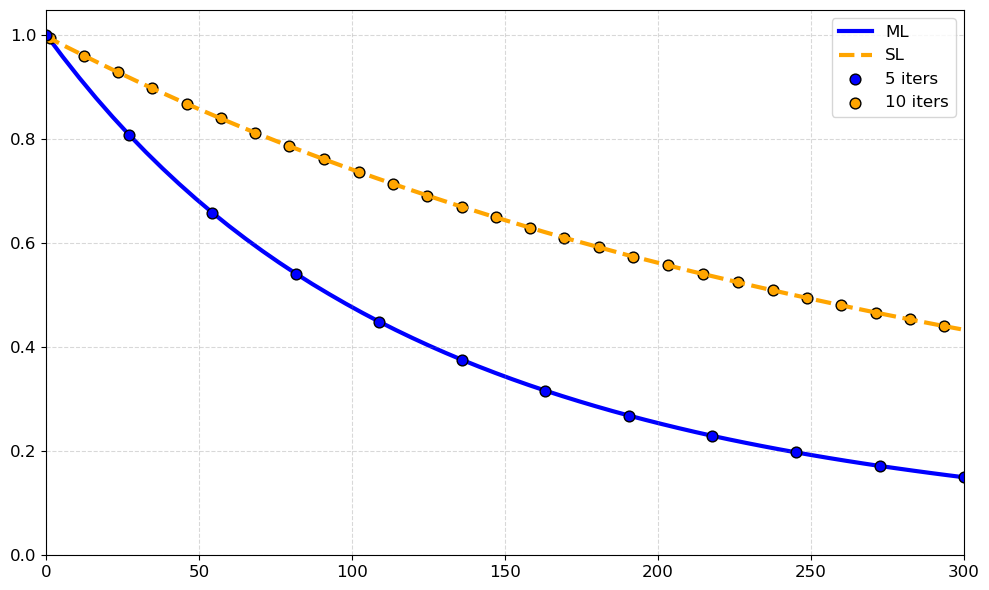

In [58]:
plt.figure(figsize=(10, 6))

plt.plot(cumaltive_times_ML, data_ML['norm_fval_ML'], linestyle='-', linewidth=3, label='ML', color='blue', zorder=1)
plt.plot(cumaltive_times_SL, data_SL['norm_fval_SL'], linestyle='--', linewidth=3, label='SL', color='orange')

highlight_every_SL = 10
highlight_every_ML = 5  

plt.scatter(cumaltive_times_ML[::highlight_every_ML], data_ML['norm_fval_ML'][::highlight_every_ML], 
            color='blue', edgecolors='black', s=60, marker='o', label="5 iters", zorder=2)

# plt.scatter(cumaltive_times_ML_all[::highlight_every], data_ML_all[::highlight_every], 
#             color='blue', edgecolors='black', s=60, marker='o', zorder=2)

# plt.scatter(cumaltive_times_ML[57], data_ML['norm_fval_ML'][57], 
#             color='red', edgecolors='black', s=60, marker='o', zorder=2)

plt.scatter(cumaltive_times_SL[1::highlight_every_SL], data_SL['norm_fval_SL'][1::highlight_every_SL], 
            color='orange', edgecolors='black', s=60, marker='o', label="10 iters")

# plt.scatter(cumaltive_times_SL_all[::highlight_every], data_SL_all[::highlight_every], 
#             color='orange', edgecolors='black', s=60, marker='o', zorder=2)

#plt.xlabel('Cumulative CPU Time (seconds)', fontsize=14)
#plt.ylabel('Normalised Function Value', fontsize=14)
#plt.yscale('log')
#plt.ylim(bottom=0.15*10e-6)
plt.xlim(right=300,left=0)
plt.grid(True, linestyle='--', color='gray', alpha=0.3)
plt.legend(fontsize=12, loc='best')

plt.gca().yaxis.set_major_locator(MultipleLocator(0.2))
plt.tight_layout()
plt.savefig('klbAx_27_5_1000.png', format='png', dpi=300, transparent=True)
plt.show()

In [71]:
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from PIL import Image
import numpy as np

# Path to TensorBoard log directory
log_dir = "runs/KLbAx_deblurring/20250503-145352"  # Replace with your path

event_acc = EventAccumulator(
    log_dir,
    size_guidance={
        'images': 1000,      # Increase this to allow more images
        'scalars': 0,
        'histograms': 0
    }
)
event_acc.Reload()

# Get all image tags
image_tags = event_acc.Tags()['images']
print("Available image tags:", image_tags)

Available image tags: ['ML_iter', 'SL_iter', 'RL_iter', 'normalised function value vs. CPU Time']


In [73]:
# Choose a tag and extract images
tag = image_tags[1]  # e.g., "my_image"
events = event_acc.Images(tag)

# Save images
output_dir = "20250503-145352_SL"
os.makedirs(output_dir, exist_ok=True)

for i, event in enumerate(events):
    img_data = event.encoded_image_string
    with open(os.path.join(output_dir, f"{tag}_{i}.png"), "wb") as f:
        f.write(img_data)

print(f"Saved {len(events)} images to {output_dir}")

Saved 20 images to 20250503-145352_SL
